# Case Study 4.1 - Movies

# Identification Information

In [1]:
# YOUR NAME              = Manuel Montoya Gamio
# YOUR MITX PRO USERNAME = manuel-montoya-gamio
# YOUR MITX PRO E-MAIL   = manuel.montoya@pucp.edu.pe

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [2]:
!pip install --upgrade pip
!pip install surprise==0.1

Requirement already up-to-date: pip in /Users/manuel/opt/anaconda3/lib/python3.7/site-packages (20.1.1)


Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go.

# Import

In [3]:
import pandas as pd
import matplotlib
import seaborn
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

%matplotlib inline

# Data

Use the [`**Dataset.load_builtin**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.Dataset.load_builtin) function to load the data.

In [4]:
# Your code here to load the data...

#loading dataset from surprise library
surprise_data = Dataset.load_builtin('ml-100k')
surprise_data

In [5]:
pd_data = pd.DataFrame(surprise_data.raw_ratings, columns= ["user", "movie", "rating", "timestamp"])
pd_data.head()

,user,movie,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


We also want to get a sense of what the data looks like. Please create a histogram of all the ratings we have in the dataset.

In [6]:
# Number of registers of the dataset
ratings = len(pd_data)
users = pd_data['user'].nunique()
movies = pd_data['movie'].nunique()

print(f"Number of registers: {ratings}")
print(f"Number of users: {users}")
print(f"Number of movies: {movies}")

Number of registers: 100000
Number of users: 943
Number of movies: 1682


In [7]:
# Checking if there are duplicate registers on the dataset for the pairs user - movie
dropped = pd_data.drop_duplicates(subset = ["user", "movie"])
len(dropped)

100000

In [8]:
# Matrix sparcity
ratings / (users * movies) 

0.06304669364224531

In [9]:
# Rating counts 
rating_counts = pd_data.get(["user", "rating"]).groupby("rating", as_index = False).count()
rating_counts

,rating,user
0,1.0,6110
1,2.0,11370
2,3.0,27145
3,4.0,34174
4,5.0,21201


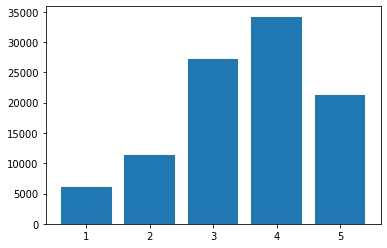

In [10]:
# Rating histogram
_ = matplotlib.pyplot.bar(rating_counts["rating"], rating_counts["user"])

<h1 style="color:black;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

The dataset consist of 100k ratings from 943 users to 1682 movies. It only has about 6% of the total possible ratings between the users and movies. There is a variate distribution over the 5 possible value of the ratings but there are more high ratings that lower ones. 

# Model 1: Random

In [11]:
# Create model using NormalPredictor() class
random_model = NormalPredictor()
random_model

In [12]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# See the cross_validate function that we have imported above
# http://surprise.readthedocs.io/en/stable/model_selection.html#surprise.model_selection.validation.cross_validate

random_model_results = cross_validate(random_model, surprise_data, measures=['RMSE'], cv=5, verbose = True)

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5077  1.5184  1.5262  1.5279  1.5246  1.5209  0.0074  
Fit time          0.10    0.10    0.10    0.10    0.10    0.10    0.00    
Test time         0.15    0.10    0.14    0.10    0.10    0.12    0.02    


# Model 2: User-Based Collaborative Filtering

In [13]:
# Create model using KNNBasic() class
# See the sim_options parameter to determine the user/item similarity calculation of the model
# http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measures-configuration

user_based_model = KNNBasic(sim_options={'user_based': True})
user_based_model

In [14]:
# Train using same cross validation code as above

user_based_model_results = cross_validate(user_based_model, surprise_data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9741  0.9772  0.9767  0.9785  0.9854  0.9784  0.0038  
Fit time          0.25    0.26    0.33    0.26    0.27    0.27    0.03    
Test time         2.51    2.49    2.57    2.48    2.47    2.50    0.04    


# Model 3: Item-Based Collaborative Filtering

In [15]:
# Create model using KNNBasic() class
# Make sure you change the sim_options parameter from above

item_based_model = KNNBasic(sim_options={'user_based': False})
item_based_model

In [16]:
# Train using same cross validation code as above
item_based_model_results = cross_validate(item_based_model, surprise_data, measures=['RMSE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9777  0.9726  0.9717  0.9724  0.9771  0.9743  0.0025  
Fit time          0.40    0.42    0.41    0.41    0.44    0.42    0.02    
Test time         2.83    2.81    2.89    3.00    2.95    2.90    0.07    


<h1 style="color:black;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

The RMSE of the trained models were the following

* Random model: 1.5209
* User based CF: 0.9784
* Item based CF: **0.9743**

The collaborative filtering models perform better than the random model reducing the RMSE in about 35% (1 - 0.9784/1.5209). The best model was the item based but the difference with the user based is not enough to draw a significant conclusion, especially since in some of the folds the user based get slightly better results. It makes sense that the CF models got better results since it's using a similarity function to make personalized recommendations and not treating the whole population as the same.

# Model 4: Matrix Factorization

In [17]:
# Create model using SVD() class
svd_model = SVD()
svd_model

In [18]:
# Train using same cross validation code as above
svd_model_results = cross_validate(svd_model, surprise_data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9279  0.9400  0.9396  0.9406  0.9326  0.9361  0.0051  
Fit time          3.75    3.77    3.77    3.87    3.77    3.79    0.04    
Test time         0.11    0.18    0.11    0.10    0.16    0.13    0.03    


<h1 style="color:black;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

Comparing with both collaborative filtering models, the RMSE is lower using matrix factorization

* User based CF: 0.9784
* Item based CF: 0.9743
* Matrix Factorization: **0.9361**

In the case of the CF models, the unknown ratings are estimated using the existing ratings of a neiborhood of similar users or items. To determine this similar users or items are compared using their vectors of ratings, but almost in all records, this vectors are disperse, which affect the performance of the model. On the other hand, the matrix factorization models find latent features that could be interpreted as the features of the movies and how much each user likes this features and getting the estimation of the rating by multipying this two vectors, which are not disperse.

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k).

In [19]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:black;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

Some code is required for this question.

In [20]:
def precision_recall_for_model_k(data, model, model_name, k):
    """Calculates precision and recall for a model and a k value for the given data"""
    
    #the kfolder will return a generator with the 5 folds for the data
    kfolder = KFold(n_splits = 5)
    
    mean_precision = 0
    mean_recall = 0
    
    for data_train, data_test in kfolder.split(data):
    
        model.fit(data_train)
        data_test_prediction = model.test(data_test, verbose = False)
        
        #calling the original function
        fold_user_precisions, fold_user_recalls = precision_recall_at_k(data_test_prediction, k=k)
        
        #to get the fold average metrics we have to average the user presicion and recall
        fold_precision = sum(fold_user_precisions.values()) / len(fold_user_precisions.values())
        fold_recall = sum(fold_user_recalls.values()) / len(fold_user_recalls.values())
        
        mean_precision += fold_precision
        mean_recall += fold_recall
    
    mean_precision = round(mean_precision / 5.0, 4)
    mean_recall = round(mean_recall / 5.0, 4)
    
    return model_name, k, mean_precision, mean_recall

In [21]:
# Use the function above to compute the 16 numerical values requested above
# See the test() function to get the predictions input to the function
# http://surprise.readthedocs.io/en/stable/algobase.html#surprise.prediction_algorithms.algo_base.AlgoBase.test

#Dataframe to store the results
pd_results = pd.DataFrame(columns = ["model", "k", "precision", "recall"])
index = 0

models = [random_model, user_based_model, item_based_model, svd_model]
model_names = ["random", "user based cf", "item based cf", "matrix factorization"]

for model, model_name in zip(models, model_names):
    for k in [5,10]:
        pd_results.loc[index] = precision_recall_for_model_k(surprise_data, model, model_name, k)
        index +=1

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [22]:
# Model with best precision
pd_results.sort_values(by = "precision", ascending = False)

,model,k,precision,recall
4,item based cf,5,0.8188,0.3904
5,item based cf,10,0.7865,0.5344
6,matrix factorization,5,0.7795,0.4291
2,user based cf,5,0.7628,0.4568
7,matrix factorization,10,0.7582,0.5627
3,user based cf,10,0.7355,0.5916
0,random,5,0.5924,0.3458
1,random,10,0.5838,0.4308


In [23]:
# Model with best recall
pd_results.sort_values(by = "recall", ascending = False)

,model,k,precision,recall
3,user based cf,10,0.7355,0.5916
7,matrix factorization,10,0.7582,0.5627
5,item based cf,10,0.7865,0.5344
2,user based cf,5,0.7628,0.4568
1,random,10,0.5838,0.4308
6,matrix factorization,5,0.7795,0.4291
4,item based cf,5,0.8188,0.3904
0,random,5,0.5924,0.3458


First of all, the values are between 0 and 1 because they're ratios and not error metrics. The best possible value for each metric is 1.

Again, the worst performing model is the random model and the collaborative filtering and matrix factorization models have similar performance with the item based performing specially well when evaluated with precision. 

The number of top k items that are recommended is also relevant since the results change for the same model.

#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [24]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

Hint: Use [`**Dataset.build_full_trainset**`](http://surprise.readthedocs.io/en/stable/dataset.html#surprise.dataset.DatasetAutoFolds.build_full_trainset) to get the full trainset from the data. Then call [`**Trainset.build_anti_testset**`](http://surprise.readthedocs.io/en/stable/trainset.html#surprise.Trainset.build_anti_testset) to get the testset out. Finally, `fit` on the trainset, `test` on the testset, then pass that result to our `get_top_n` function.

<h1 style="color:black;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

Some code is required for this question.

In [26]:
# Use the function and hints above to give the top-n predictions for a given user, for a reasonable value of n

#Splitting the dataset in train - test
surprise_train = surprise_data.build_full_trainset()
surprise_test = surprise_train.build_anti_testset()

In [27]:
models = [random_model, user_based_model, item_based_model, svd_model]
model_names = ["random", "user based cf", "item based cf", "matrix factorization"]

for model, model_name in zip(models, model_names):
    
    print("------------------------------------------------------------")
    print(model_name)
    print("------------------------------------------------------------")
    
    #fit and predict
    model.fit(surprise_train)
    predictions = model.test(surprise_test)
    
    top_n = get_top_n(predictions, n = 10)
    
    #get recommendations for the first user
    user = list(top_n.keys())[0]
    user_recommendations = top_n[user]
    
    #we print the top 10 recommendations for the user
    print(user_recommendations)
    
    #we get the recommended movies 
    movies = [item[0] for item in user_recommendations]

    #compare to actual ratings of the user for the recommended movies 
    complete_rows = [item for item in predictions if item[0] == user and item[1] in movies]
    for row in complete_rows:
        print(row)
    

------------------------------------------------------------
random
------------------------------------------------------------
[('377', 5), ('346', 5), ('265', 5), ('234', 5), ('98', 5), ('193', 5), ('88', 5), ('241', 5), ('526', 5), ('135', 5)]
user: 196        item: 377        r_ui = 3.53   est = 5.00   {'was_impossible': False}
user: 196        item: 346        r_ui = 3.53   est = 5.00   {'was_impossible': False}
user: 196        item: 265        r_ui = 3.53   est = 5.00   {'was_impossible': False}
user: 196        item: 234        r_ui = 3.53   est = 5.00   {'was_impossible': False}
user: 196        item: 98         r_ui = 3.53   est = 5.00   {'was_impossible': False}
user: 196        item: 193        r_ui = 3.53   est = 5.00   {'was_impossible': False}
user: 196        item: 88         r_ui = 3.53   est = 5.00   {'was_impossible': False}
user: 196        item: 241        r_ui = 3.53   est = 5.00   {'was_impossible': False}
user: 196        item: 526        r_ui = 3.53   est = 5.

The rating values are high and over the threshold, so they make sense with the implemented logic. The predominant value of the ratings in the recommendations is 5, which also makes sense since this are the top n recommendations.

About how should this information can be used, this top n movies must be at the top of the screen in our platform (web or mobile app) since the probability that the user likes the movie is high. 

After we showed the user the top n items we should be listening on the implicit feedback from the user. How they interact with this top-n can help us calibrate better our model: if the user clicks or watches a movie, the user may like it, if they ignore it, it may not be a good movie for the user. We can use this active learning to improve the model constantly.

<hr>

Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.